In [1]:
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from glob import glob

In [2]:
ML_MODEL = False

path = "./stat_models"
model_directories = glob(path + "/*/")

station_names = [file.split("/")[-1][:5] for file in glob(f"{path}/*.pkl")]

In [3]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

scores_df = {}

def plot_scatter_plot(y_hat, y_test, model_name, save_fig=False):
    
    if ML_MODEL:
        model_name += " Regression"
        
    if model_name == "BiDirectional LSTM":
        model_name = "Bi-Directional LSTM"
    
    if model_name == "LSTM AutoEncoder":
        model_name = "LSTM Auto-Encoder"
    
    rmse = np.sqrt(mean_squared_error(y_hat, y_test))
    mae = mean_absolute_error(y_hat, y_test)

    msg_rmse = f"RMSE: {rmse.round(3)}"
    msg_mae =  f"MAE:   {mae.round(3):.3f}"
#     msg_mean = f"MEAN: {y_test.mean().round(3)}"
  
    msg = msg_rmse + '\n' + msg_mae

    plt.scatter(y_test, y_hat, marker='.', c="k")
    x_lim = plt.xlim([0, y_test.max()])
    y_lim = plt.ylim([0, y_test.max()])
    plt.plot(y_lim, y_lim, '--', color = 'r')
    plt.xlabel('Actual', fontsize=14)
    plt.xticks(fontsize=14)
    plt.ylabel('Predictions', fontsize=14)
    plt.title(f'Kolkata\n{model_name}', fontsize=16)
    plt.grid(ls="--")
    
    scores_df[model_name] = {
        "MAE": mae,
        "RMSE": rmse,
    }
    
    plt.text(150, 30, msg,
             bbox=dict(facecolor='white', alpha=1),
             horizontalalignment='left',
             verticalalignment='center',
             fontsize=14)
    
    if save_fig:
        plt.savefig(f"./paper_figures/kolkata_{model_name}_scatter.png", dpi=300, bbox_inches='tight')
    
    plt.show()

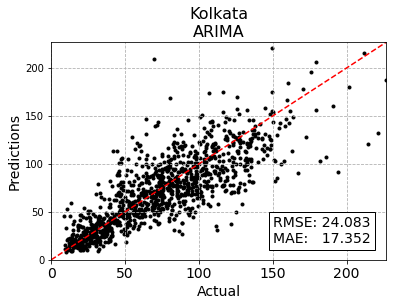

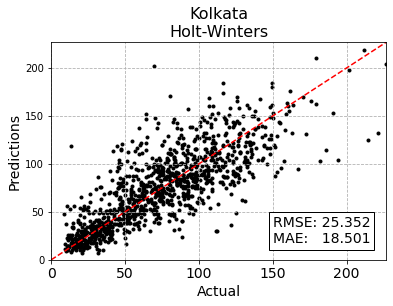

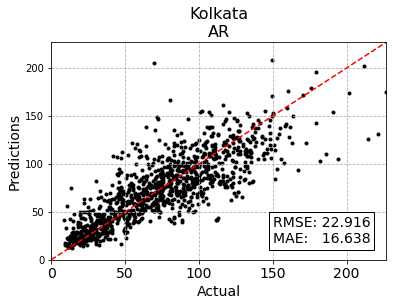

In [4]:
for model_idx in range(len(model_directories)):

    y_test = np.array([])
    y_hat = np.array([])

    for station_idx in range(len(station_names)):
        pkl_file = model_directories[model_idx] + station_names[station_idx] + "_pm25.pkl"
        pkl_obj = pickle.load(open(pkl_file, "rb"))

        y_test = np.append(y_test, pkl_obj["test_set"].reshape(-1, 1))
        y_hat = np.append(y_hat, pkl_obj["test_set_predictions"].reshape(-1, 1))

    plot_scatter_plot(y_hat, y_test, model_directories[model_idx].split("/")[-2], save_fig=True)

In [5]:
print(pd.DataFrame(scores_df).transpose().round(3).to_latex())

\begin{tabular}{lrr}
\toprule
{} &     MAE &    RMSE \\
\midrule
ARIMA        &  17.352 &  24.083 \\
Holt-Winters &  18.501 &  25.352 \\
AR           &  16.638 &  22.916 \\
\bottomrule
\end{tabular}

